In [3]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import os 
import random 
import numpy as ny 
from matplotlib import pyplot as plt

In [7]:
plt.imshow??

Signature:
plt.imshow(
    X: 'ArrayLike | PIL.Image.Image',
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    *,
    aspect: "Literal['equal', 'auto'] | float | None" = None,
    interpolation: 'str | None' = None,
    alpha: 'float | ArrayLike | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    colorizer: 'Colorizer | None' = None,
    origin: "Literal['upper', 'lower'] | None" = None,
    extent: 'tuple[float, float, float, float] | None' = None,
    interpolation_stage: "Literal['data', 'rgba', 'auto'] | None" = None,
    filternorm: 'bool' = True,
    filterrad: 'float' = 4.0,
    resample: 'bool | None' = None,
    url: 'str | None' = None,
    data=None,
    **kwargs,
) -> 'AxesImage'
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image, set up the col

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
len(gpus)

0

In [13]:
gpus

[]

In [16]:
for gpu in gpus:
    print(gpu)

In [17]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [18]:
POS_PATH

'data\\positive'

In [21]:
os.makedirs(POS_PATH, exist_ok=True)
os.makedirs(NEG_PATH, exist_ok=True)
os.makedirs(ANC_PATH, exist_ok=True)

In [22]:
# http://vis-www.cs.umass.edu/lfw

In [25]:
!tar -xf lfw.tgz

In [38]:
import shutil

In [57]:
#for directory in os.listdir('lfw'):
 #   for file in os.listdir(os.path.join('lfw', directory)):  # Already moved the pictures from lfw to negative folder so this function will not work anymore!!!
  #      EX_PATH = os.path.join('lfw', directory, file)
   #     NEW_PATH = os.path.join(NEG_PATH, file)
    #    os.replace(EX_PATH, NEW_PATH)

In [58]:
#os.listdir('lfw')

In [56]:
#for directory in os.listdir('lfw'):
 #   for file in os.listdir(os.path.join('lfw', directory)): # Already moved the files, this function will not work anymore because it depends on the path
  #      print (os.path.join(NEG_PATH, file))

In [111]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    cv2.imshow('Image Collection', frame)

    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [45]:
cv2.waitKey??

Docstring:
waitKey([, delay]) -> retval
.   @brief Waits for a pressed key.
.   
.   The function waitKey waits for a key event infinitely (when \f$\texttt{delay}\leq 0\f$ ) or for delay
.   milliseconds, when it is positive. Since the OS has a minimum time between switching threads, the
.   function will not wait exactly delay ms, it will wait at least delay ms, depending on what else is
.   running on your computer at that time. It returns the code of the pressed key or -1 if no key was
.   pressed before the specified time had elapsed. To check for a key press but not wait for it, use
.   #pollKey.
.   
.   @note The functions #waitKey and #pollKey are the only methods in HighGUI that can fetch and handle
.   GUI events, so one of them needs to be called periodically for normal event processing unless
.   HighGUI is used within an environment that takes care of event processing.
.   
.   @note The function only works if there is at least one HighGUI window created and the window is


In [47]:
frame

array([[[150, 172, 172],
        [149, 171, 172],
        [147, 170, 172],
        ...,
        [ 96,  88,  91],
        [127, 118, 123],
        [135, 126, 131]],

       [[149, 171, 171],
        [148, 170, 171],
        [147, 170, 172],
        ...,
        [129, 123, 126],
        [146, 140, 144],
        [150, 144, 148]],

       [[147, 169, 169],
        [147, 169, 170],
        [148, 170, 172],
        ...,
        [143, 143, 145],
        [151, 150, 153],
        [154, 153, 156]],

       ...,

       [[132, 119,  92],
        [131, 118,  91],
        [128, 116,  89],
        ...,
        [188, 198, 200],
        [189, 200, 201],
        [191, 202, 203]],

       [[135, 118,  93],
        [132, 117,  92],
        [130, 117,  90],
        ...,
        [177, 187, 189],
        [176, 188, 189],
        [177, 189, 190]],

       [[134, 116,  92],
        [132, 116,  91],
        [131, 117,  90],
        ...,
        [170, 180, 182],
        [169, 181, 182],
        [169, 181, 182]]

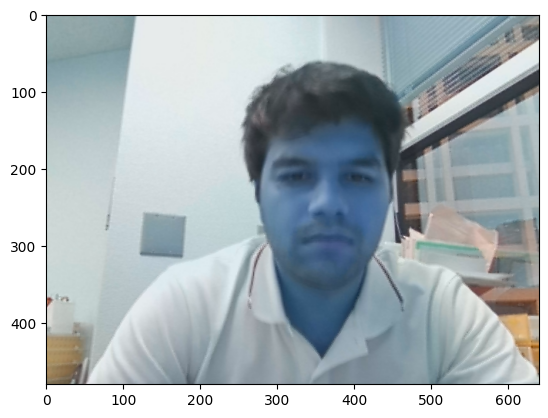

In [50]:
plt.imshow(frame)

In [51]:
frame.shape

(480, 640, 3)

In [52]:
frame[:250,:250, :].shape

(250, 250, 3)

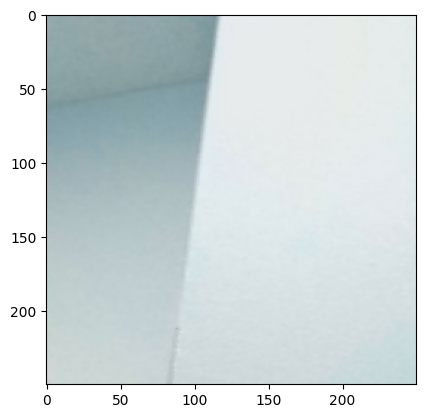

In [53]:
plt.imshow(frame[:250,:250, :])

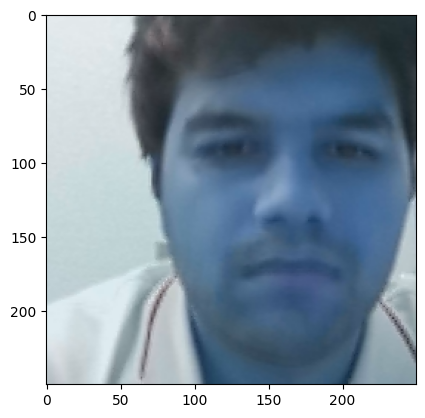

In [59]:
plt.imshow(frame[120:120+250, 200:200+250, :])

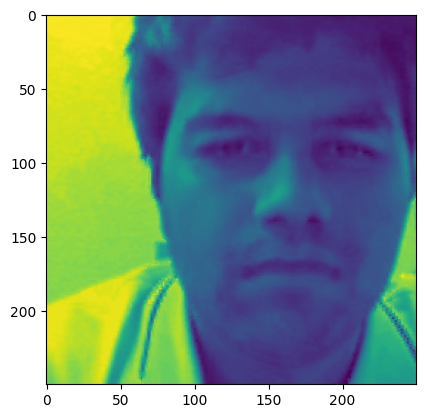

In [60]:
plt.imshow(frame[120:120+250, 200:200+250, 0])

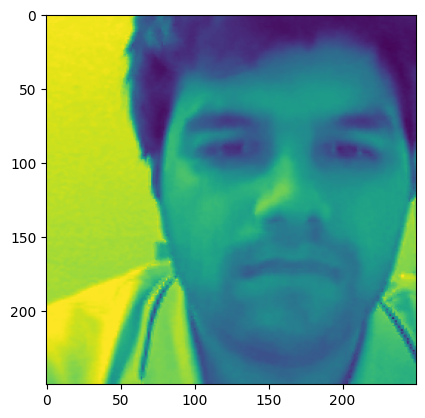

In [61]:
plt.imshow(frame[120:120+250, 200:200+250, 2])

In [63]:
#creating unique images
import uuid

In [66]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\aa4ddad1-8a1a-11f0-9993-e59bf518a7e5.jpg'

In [110]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #cut down frame to 250x250px
    frame = frame[120:120+250, 200:200+250, :]

    #collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)

    #collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)

    #show image back to screen
    cv2.imshow('Image Collection', frame)

    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [75]:
anchor = tf.data.Dataset.list_files(ANC_PATH + '/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH + '/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').take(300)

In [78]:
ANC_PATH + '/*.jpg'

'data\\anchor/*.jpg'

In [76]:
dir_test = anchor.as_numpy_iterator()

In [77]:
dir_test.next()

b'data\\anchor\\b9d5dae4-8a1b-11f0-abe5-e59bf518a7e5.jpg'

In [79]:
print(dir_test.next())

b'data\\anchor\\b8d1ed4a-8a1b-11f0-8f58-e59bf518a7e5.jpg'


In [85]:
def preprocess(file_path):
    
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100,100))
    img = img / 255.0
    return img

In [82]:
img = preprocess('data\\anchor\\b8d1ed4a-8a1b-11f0-8f58-e59bf518a7e5.jpg')

In [83]:
img.numpy().min()

np.float32(0.08848039)

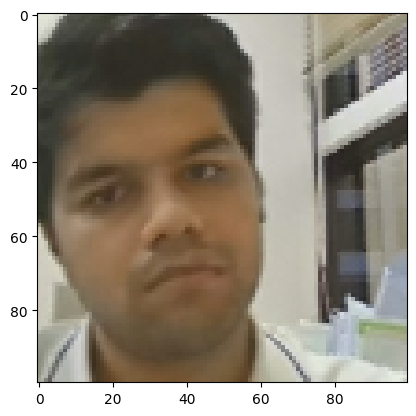

In [84]:
plt.imshow(img)

In [94]:
dataset = anchor.concatenate(positive).concatenate(negative)
dataset = dataset.map(preprocess)

In [88]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [89]:
tf.ones_like([1,1,1,4.35235,2352.4])

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [97]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [98]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [103]:
class_labels = tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [104]:
iterator_labs = class_labels.as_numpy_iterator()

In [105]:
iterator_labs.next()

np.float32(0.0)

In [96]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [108]:
samples = data.as_numpy_iterator()

In [109]:
samples.next()

(b'data\\anchor\\c676f9a9-8a1b-11f0-b068-e59bf518a7e5.jpg',
 b'data\\positive\\1c6f98a7-8a1b-11f0-8e88-e59bf518a7e5.jpg',
 np.float32(1.0))